# Graph Algorithms

### 1 - Connected components

In [29]:
import networkx as nx
import osmnx as os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
from IPython.display import Image
import community

# graph figure settings
graph_settings = {'fig_height' :10, 
                  'fig_width' :12, 
                  'node_color' :'#F42334',
                  'edge_color' :'#253F51', 
                  'edge_alpha' :.5, 
                  'node_alpha' : 1}

arrow_settings = {'arrowstyle' :"->", 
                  'connectionstyle' : "angle3,angleA=0,angleB=-90",
                  'color': '#49a347'}
bbox_settings =  {'boxstyle': "round4,pad=.5", 'fc': "0.9"}

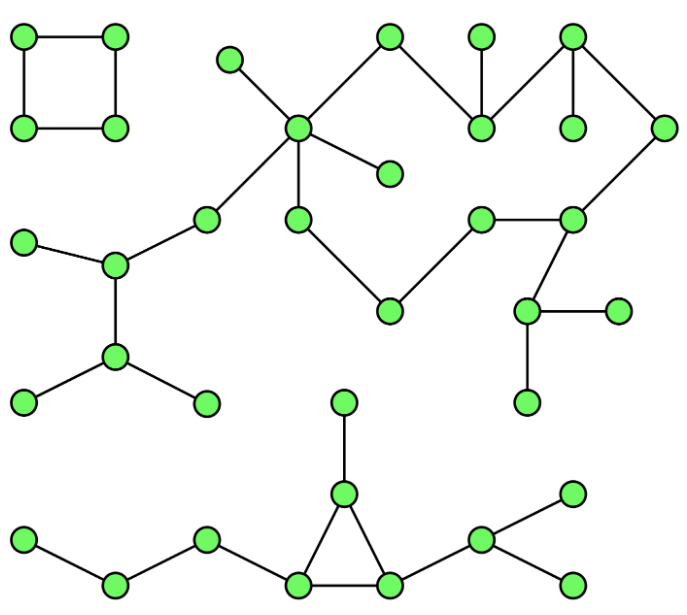

In [3]:
path_images = "images/"
Image(path_images + 'connected_components.png')

You can think of Connected Components in very layman’s terms as a sort of a hard clustering algorithm which finds clusters/islands in related/connected data. 

A use-case: We can assume edges(roads) between CustomerIDs based on same credit card usage, or same address or same mobile number, etc. Once we have those connections, we can then run the connected component algorithm on the same to create individual clusters to which we can then assign a family ID.

Another use case would be to capture fraud using these family IDs. If an account has done fraud in the past, it is highly probable that the connected accounts are also susceptible to fraud.

In [4]:
edgelist = [['Utrecht', 'Zwolle', 85], 
            ['Utrecht', 'Hardenberg', 80], 
            ['Groningen', 'Harlingen', 186], 
            ['Amsterdam', 'Naarden', 167], 
            ['Amsterdam', 'Breda', 84], 
            ['Amsterdam', 'Maastricht', 502], 
            ['Naarden', 'Rotterdam', 183], 
            ['Naarden', 'Harlingen', 103], 
            ['Naarden', 'Amsterdam', 167], 
            ['Rotterdam', 'Naarden', 183], 
            ['Breda', 'Amsterdam', 84], 
            ['Breda', 'Hardenberg', 250], 
            ['Maastricht', 'Amsterdam', 502], 
            ['Maastricht', 'Zwolle', 173], 
            ['Zwolle', 'Utrecht', 85], 
            ['Zwolle', 'Harlingen', 217], 
            ['Zwolle', 'Maastricht', 173], 
            ['Harlingen', 'Naarden', 103], 
            ['Harlingen', 'Groningen', 186], 
            ['Harlingen', 'Zwolle', 217], 
            ['Hardenberg', 'Utrecht', 80], 
            ['Hardenberg', 'Naarden', 250],
            ["Mumbai", "Delhi",400],
            ["Delhi", "K",500],
            ["K", "Bangalore",600],
            ["TX", "NY",1200],
            ["ALB", "NY",800]]

In [5]:
G = nx.Graph()
for edge in edgelist:
    G.add_edge(edge[0], edge[1], eight = edge[2])

In [6]:
for i, x in enumerate(nx.connected_components(G)):
    print ("Component " + str(i), x)

Component 0 {'Hardenberg', 'Groningen', 'Utrecht', 'Amsterdam', 'Maastricht', 'Breda', 'Harlingen', 'Rotterdam', 'Zwolle', 'Naarden'}
Component 1 {'K', 'Delhi', 'Mumbai', 'Bangalore'}
Component 2 {'TX', 'ALB', 'NY'}


### 2 - Shortest Path

In graph theory, the shortest path problem is the problem of finding a path between two vertices (or nodes) in a graph such that the sum of the weights of its constituent edges is minimized.


- **Dijkstra's algorithm** solves the single-source shortest path problem with non-negative edge weight.
- **Bellman–Ford algorithm** solves the single-source problem if edge weights may be negative.
- **A* search algorithm** solves for single pair shortest path using heuristics to try to speed up the search.
- **Floyd–Warshall algorithm** solves all pairs shortest paths.
- **Johnson's algorithm** solves all pairs shortest paths, and may be faster than Floyd–Warshall on sparse graphs.
- **Viterbi algorithm** solves the shortest stochastic path problem with an additional probabilistic weight on each node.

In [7]:
print(nx.shortest_path(G, 'Rotterdam','Amsterdam',weight='weight'))
print(nx.shortest_path_length(G, 'Rotterdam','Amsterdam',weight='weight'))

['Rotterdam', 'Naarden', 'Amsterdam']
2


In [8]:
for x in nx.all_pairs_dijkstra_path(G,weight='weight'):
    print(x)

('Utrecht', {'Utrecht': ['Utrecht'], 'Zwolle': ['Utrecht', 'Zwolle'], 'Hardenberg': ['Utrecht', 'Hardenberg'], 'Maastricht': ['Utrecht', 'Zwolle', 'Maastricht'], 'Harlingen': ['Utrecht', 'Zwolle', 'Harlingen'], 'Breda': ['Utrecht', 'Hardenberg', 'Breda'], 'Naarden': ['Utrecht', 'Hardenberg', 'Naarden'], 'Amsterdam': ['Utrecht', 'Zwolle', 'Maastricht', 'Amsterdam'], 'Groningen': ['Utrecht', 'Zwolle', 'Harlingen', 'Groningen'], 'Rotterdam': ['Utrecht', 'Hardenberg', 'Naarden', 'Rotterdam']})
('Zwolle', {'Zwolle': ['Zwolle'], 'Utrecht': ['Zwolle', 'Utrecht'], 'Maastricht': ['Zwolle', 'Maastricht'], 'Harlingen': ['Zwolle', 'Harlingen'], 'Hardenberg': ['Zwolle', 'Utrecht', 'Hardenberg'], 'Amsterdam': ['Zwolle', 'Maastricht', 'Amsterdam'], 'Groningen': ['Zwolle', 'Harlingen', 'Groningen'], 'Naarden': ['Zwolle', 'Harlingen', 'Naarden'], 'Breda': ['Zwolle', 'Utrecht', 'Hardenberg', 'Breda'], 'Rotterdam': ['Zwolle', 'Harlingen', 'Naarden', 'Rotterdam']})
('Hardenberg', {'Hardenberg': ['Hardenbe

# 3. Minimum Spanning Tree

f.i. We work for a water pipe laying company or an internet fiber company. We need to connect all the cities in the graph we have using the minimum amount of wire/pipe. How do we do this?

- Minimum spanning trees have direct applications in the design of networks, including computer networks, telecommunications networks, transportation networks, water supply networks, and electrical grids (which they were first invented for)
- MST is used for approximating the traveling salesman problem
- Clustering — First construct MST and then determine a threshold value for breaking some edges in the MST using Intercluster distances and Intracluster distances.
- Image Segmentation — It was used for Image segmentation where we first construct an MST on a graph where pixels are nodes and distances between pixels are based on some similarity measure(color, intensity, etc.)

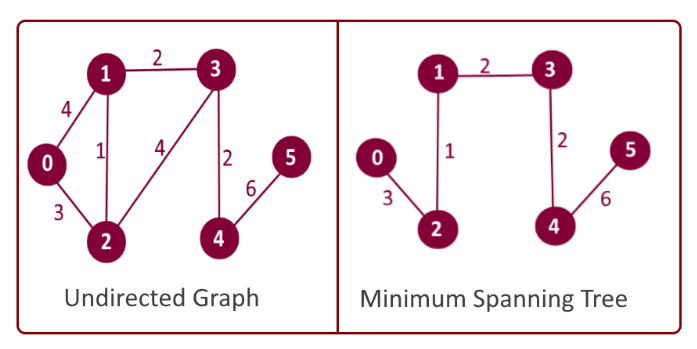

In [9]:
Image(path_images + "minimum_spanning_tree.png")

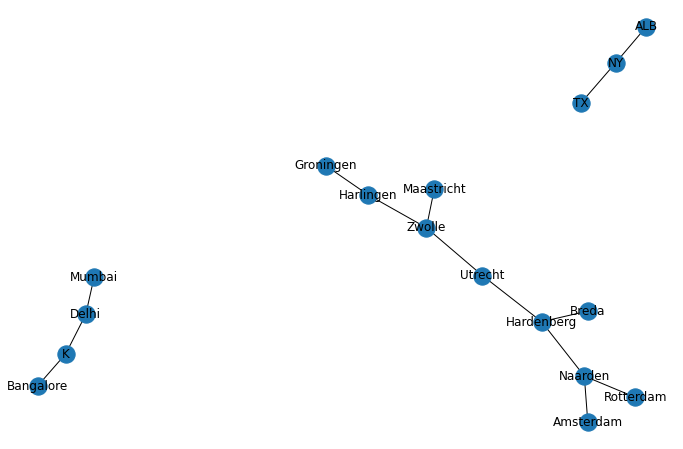

In [10]:
mst = nx.minimum_spanning_tree(G)
import matplotlib.pyplot as plt
f, ax = plt.subplots(figsize=(12,8))
nx.draw(mst, with_labels=True, ax=ax)

### PageRank

It assigns scores to pages based on the number and quality of incoming and outgoing links.

 - It has been used for finding the most influential papers using citations.
 - Has been used by Google to rank pages
 - It can be used to rank tweets- User and Tweets as nodes. Create Link between user if user A follows user B and Link between user and Tweets if user tweets/retweets a tweet.
 - Recommendation engines

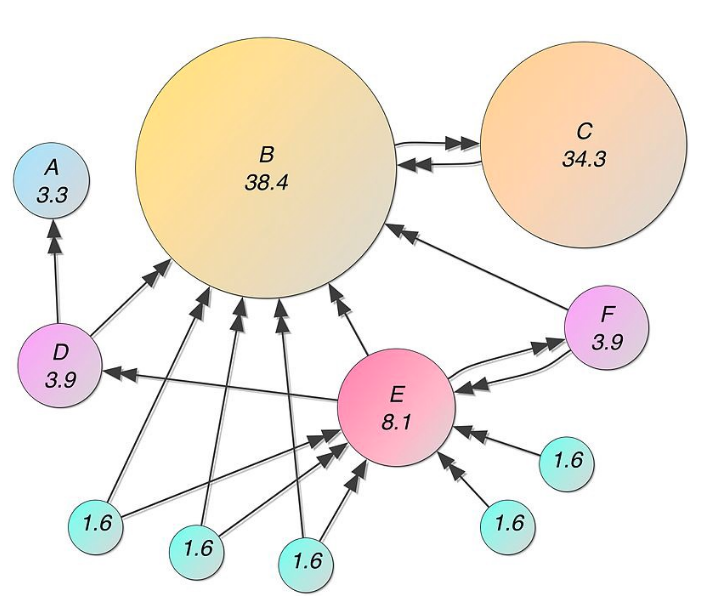

In [11]:
Image(path_images + 'pagerank.png')

In [12]:
fb = nx.read_edgelist("datasets/facebook-combined.txt", create_using=nx.Graph(), nodetype=int)

# spring layout: Position nodes using Fruchterman-Reingold force-directed algorithm.
pos = nx.spring_layout(fb)

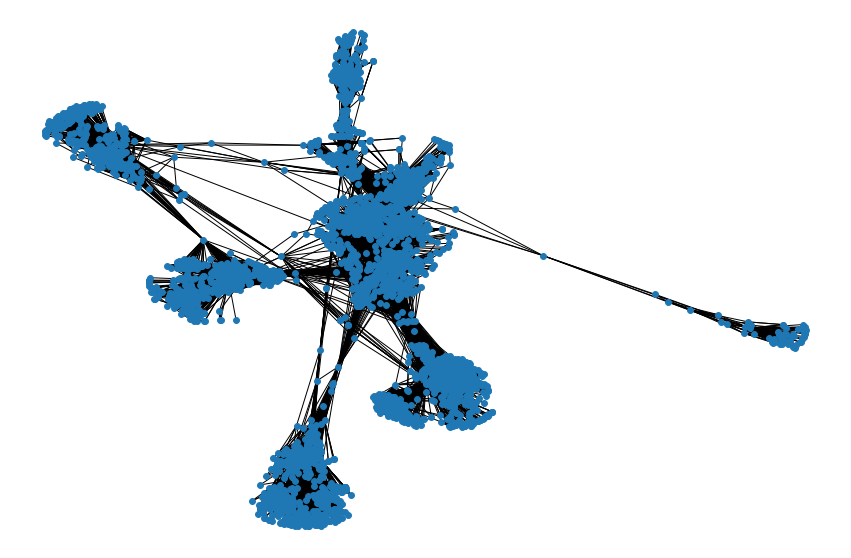

In [14]:
f, ax = plt.subplots(figsize=[15, 10])
nx.draw_networkx(fb, pos, with_labels = False, node_size = 35, ax=ax)
_ = plt.axis("off")

Now we want to find the users having high influence capability.

Intuitively, the Pagerank algorithm will give a **higher score to a user who has a lot of friends who in turn have a lot of FB Friends**

In [15]:
pageranks = nx.pagerank(fb)

In [16]:
top_n = 5
top_most_influential = [k for k, n in sorted(pageranks.items(), key = lambda x: x[1], reverse=True)[:top_n]]

node 3437, 107, 1684, 0, 1912 have a lot of friends who in turn have a lot of FB Friends. Let's highlight this node in the network graph:

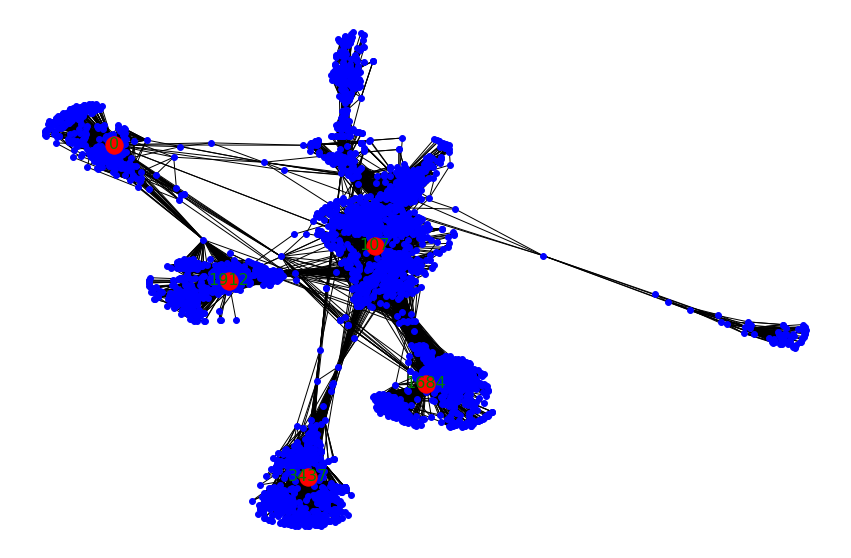

In [17]:
import warnings
f, ax = plt.subplots(figsize=[15, 10])
warnings.filterwarnings('ignore')
nx.draw_networkx(fb, pos=pos, with_labels = False, node_size=35, 
                 font_size=16, node_color='blue', font_color='white', ax=ax)
nx.draw_networkx(fb.subgraph(top_most_influential), pos=pos, font_size=16, 
                 node_color='red', font_color='green', ax=ax)
_ = plt.axis("off")

We can also see the subgraph of the most influential user

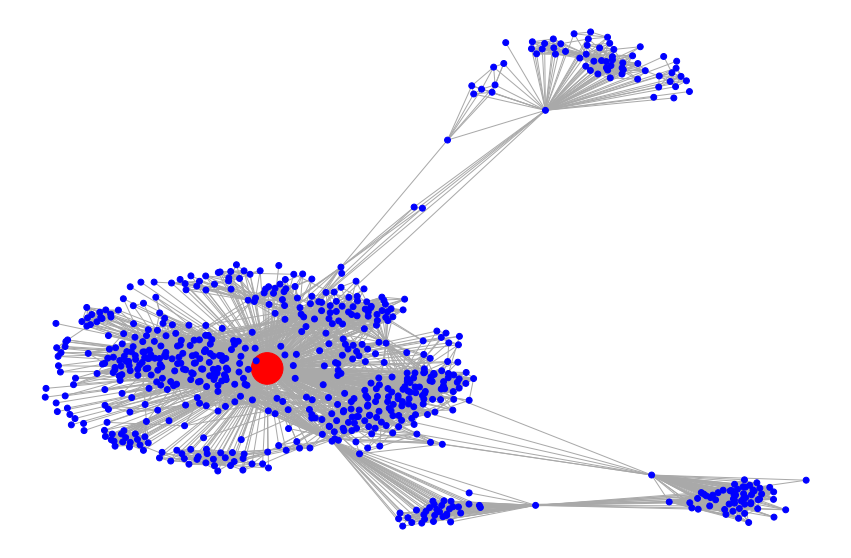

In [18]:
influential_node = 3437
first_degree_nodes = list(fb.neighbors(influential_node))

second_degree_nodes = []
for i in first_degree_nodes:
    second_degree_nodes += list(fb.neighbors(i))
second_degree_nodes.remove(influential_node)
second_degree_nodes = list(set(second_degree_nodes))

subgraph = nx.subgraph(fb,first_degree_nodes + second_degree_nodes)
pos = nx.spring_layout(subgraph)

node_color = ['red' if v == influential_node else 'blue' for v in subgraph]
node_size =  [1000 if v == influential_node else 35 for v in subgraph]

f, ax = plt.subplots(figsize=[15, 10])
nx.draw_networkx(subgraph, pos, with_labels = False, 
                 node_color=node_color,node_size=node_size, 
                 edge_color = "darkgray",
                 ax=ax)
_ = plt.axis("off")

### 5. Centrality Measures

 - **degree centrality** --> Degree of a node is basically number of edges that it has. The basic intuition is that, nodes with more connections are more influential and important in a network. In other words, the person with higher friend count in a social network, the more cited paper (in-degree) in a scientific citation network is the one that is more central according to this metric.
 
 - **Betweenness Centrality** --> is another centrality that is based on shortest path between nodes. It is determined as number of the shortest paths passing by the given node.
 
 - **Closeness Centrality** --> is a self-explanatory measure where each node’s importance is determined by closeness to all other nodes. 
 
 - **Eigenvector Centrality** --> Measures a node's connection to those who are highly connected. A node/person with a high score will be someone who is influencing multiple players (who in turn are highly connected) and is exercising control behind the scenes.

In [19]:
def draw_graph(G, pos, measures, measure_name, ax):
    
    nsize = np.array([v for v in measures.values()])
    nsize = 500*( nsize - min(nsize))/(max(nsize) - min(nsize))
    
    nodes = nx.draw_networkx_nodes(G, pos, node_size=nsize, cmap=plt.cm.RdYlGn,
                                   node_color=list(measures.values()), 
                                   nodelist = measures.keys(), alpha = .9)
    nodes.set_norm(mcolors.SymLogNorm(linthresh=0.01, linscale=1))
    
    # labels = nx.draw_networkx_labels(G, pos)
    edges = nx.draw_networkx_edges(G, pos, edge_color='darkgray', ax=ax)
    
    plt.title(measure_name)
    plt.colorbar(nodes)
    plt.axis('off')
    plt.show()

In [117]:
G = nx.karate_club_graph()
pos = nx.spring_layout(G)

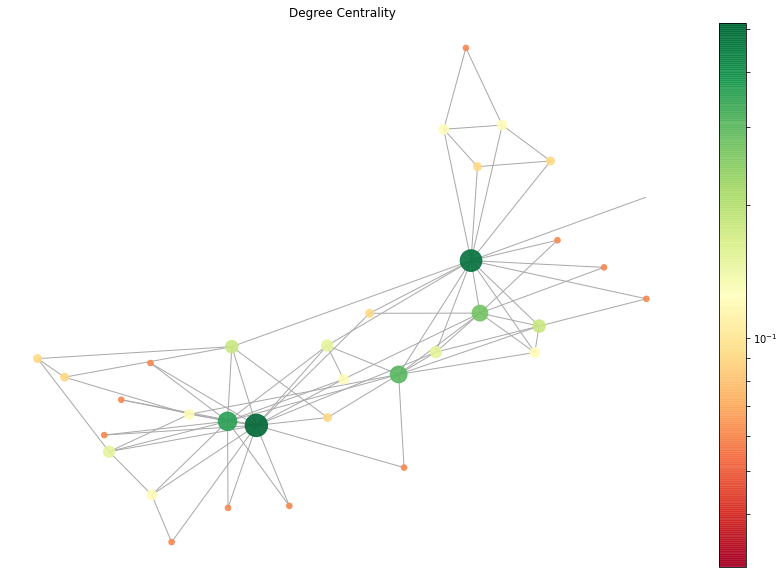

In [106]:
# draw degree centrality
f, ax = plt.subplots(figsize=[15,10])
draw_graph(G=G, pos = pos, measures=nx.degree_centrality(G), measure_name='Degree Centrality', ax=ax)

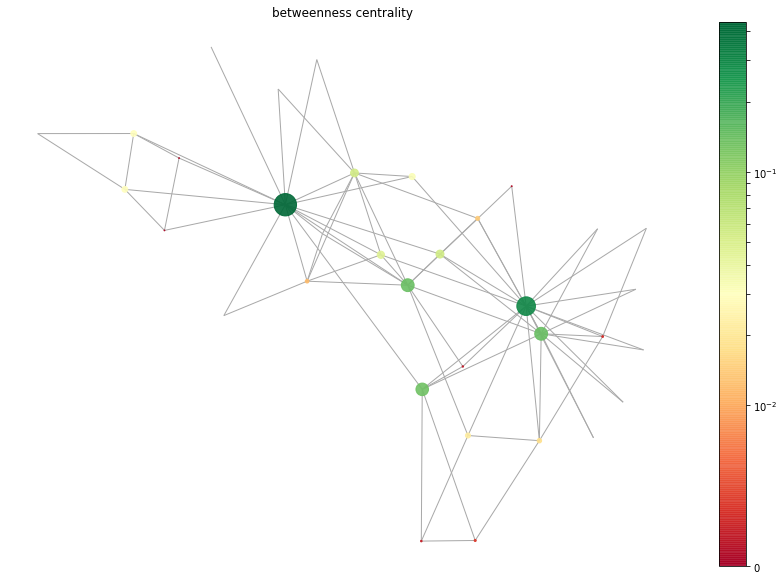

In [24]:
# draw betweenness centrality
f, ax = plt.subplots(figsize=[15,10])
draw_graph(G=G, pos=pos, measures=nx.betweenness_centrality(G), 
           measure_name="betweenness centrality",ax=ax)

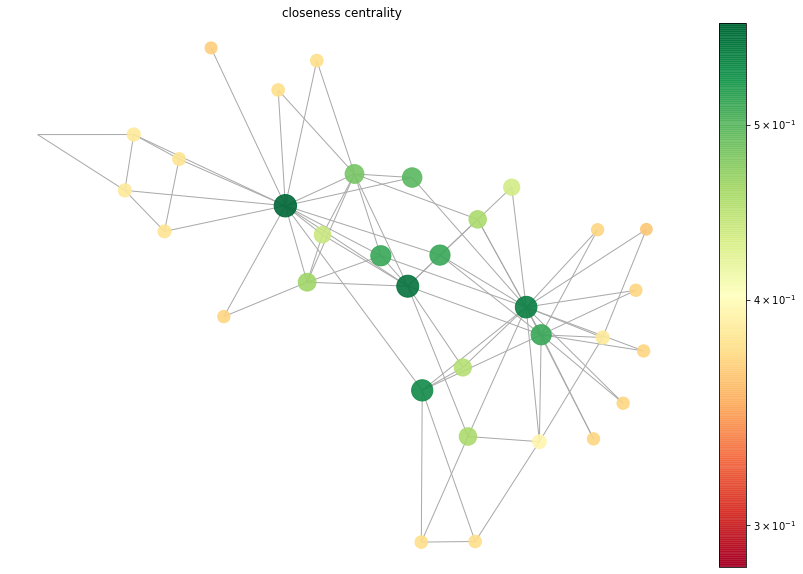

In [25]:
# draw closeness centrality
f, ax = plt.subplots(figsize=[15,10])
draw_graph(G=G, pos=pos, measures=nx.closeness_centrality(G), 
           measure_name="closeness centrality",ax=ax)

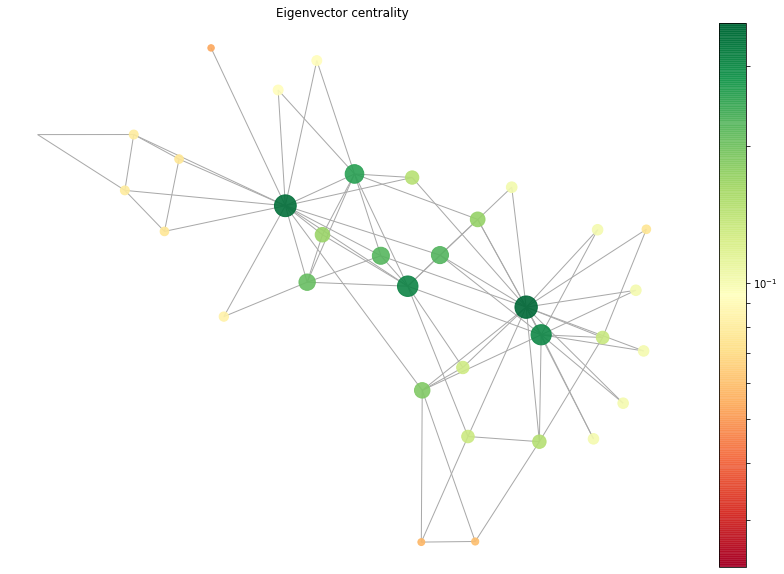

In [26]:
# Draw Eigenvector centrality
f, ax = plt.subplots(figsize=[15,10])
draw_graph(G=G, pos=pos, measures=nx.eigenvector_centrality(G), 
           measure_name="Eigenvector centrality",ax=ax)

### making Graphs from Open Street Map data

with the awesome OSMNX module

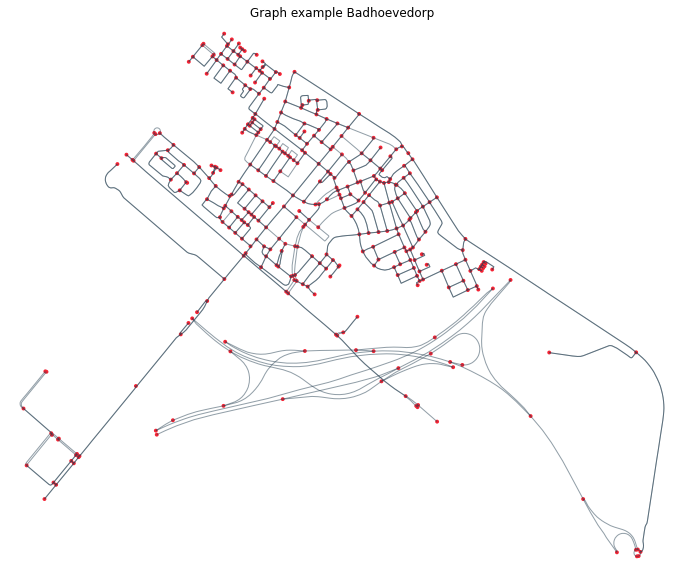

In [27]:
import osmnx as ox
G = ox.graph_from_place('badhoevedorp, Netherlands', network_type='drive')
fig, ax = ox.plot_graph(ox.project_graph(G), show=False, close=False, **graph_settings)
_ = ax.set(title = 'Graph example Badhoevedorp')

### -6 Community Detection


https://orbifold.net/default/community-detection-using-networkx/

 - **Louvain Algorithm for Community Detection** --> This algorithm works on the principle of partitioning a network into mutually exclusive communities such that the number of edges across different communities is significantly less than expectation, whereas the number of edges within each community is significantly greater than expectation.
 
 - Networkx has a built-in **Clauset-Newman-Moore greedy modularity maximization method**. This method currently supports the Graph class and does not consider edge weights. Greedy modularity maximization begins with each node in its own community and joins the pair of communities that most increases modularity until no such pair exists.

In [93]:
fb = nx.read_edgelist("datasets/facebook-combined.txt", create_using=nx.Graph(), nodetype=int)

# spring layout: Position nodes using Fruchterman-Reingold force-directed algorithm.
pos = nx.spring_layout(fb, k=.1)

In [59]:
# Starting with an initial partition of the graph and running the Louvain algorithm for Community Detection
partition=community.best_partition(fb, weight='MsgCount')
print('Completed Louvain algorithm .. . . ' )
number_of_communities = len(np.unique([x for x in partition.values()]))
print(f'number_of_communities : {number_of_communities}')

Completed Louvain algorithm .. . . 
number_of_communities : 16


In [94]:
communities = sorted(nx.algorithms.community.greedy_modularity_communities(fb), key=len, reverse=True)

In [95]:
def attach_node_community(G, communities):
    """
    attaches the community to the node attributes
    """
    for c, node_set in enumerate(communities):
        for node in node_set:
            G.nodes[node]['community'] = c + 1

In [96]:
def attach_edge_community(G):
    """
    Find internal edges and add their community to their attributes
    """
    for v, w, in G.edges:
        if G.nodes[v]['community'] == G.nodes[w]['community']:
            # Internal community edge
            G.edges[v, w]['community'] = G.nodes[v]['community']
        else:
            # External edge, no community to 0
            G.edges[v, w]['community'] = 0
            
def get_color(i, r_off=1, g_off=1, b_off=1):
    '''Assign a color to a vertex.'''
    r0, g0, b0 = 0, 0, 0
    n = 16
    low, high = 0.1, 0.9
    span = high - low
    r = low + span * (((i + r_off) * 3) % n) / (n - 1)
    g = low + span * (((i + g_off) * 5) % n) / (n - 1)
    b = low + span * (((i + b_off) * 7) % n) / (n - 1)
    return (r, g, b)   

In [97]:
attach_node_community(fb, communities=communities)
attach_edge_community(fb)

In [98]:
node_color = [get_color(fb.nodes[v]['community']) for v in fb.nodes]

# Set community color for edges between members of the same community (internal) and intra-community edges (external)
external = [(v, w) for v, w in fb.edges if fb.edges[v, w]['community'] == 0]
internal = [(v, w) for v, w in fb.edges if fb.edges[v, w]['community'] > 0]
internal_color = ['black' for e in internal]

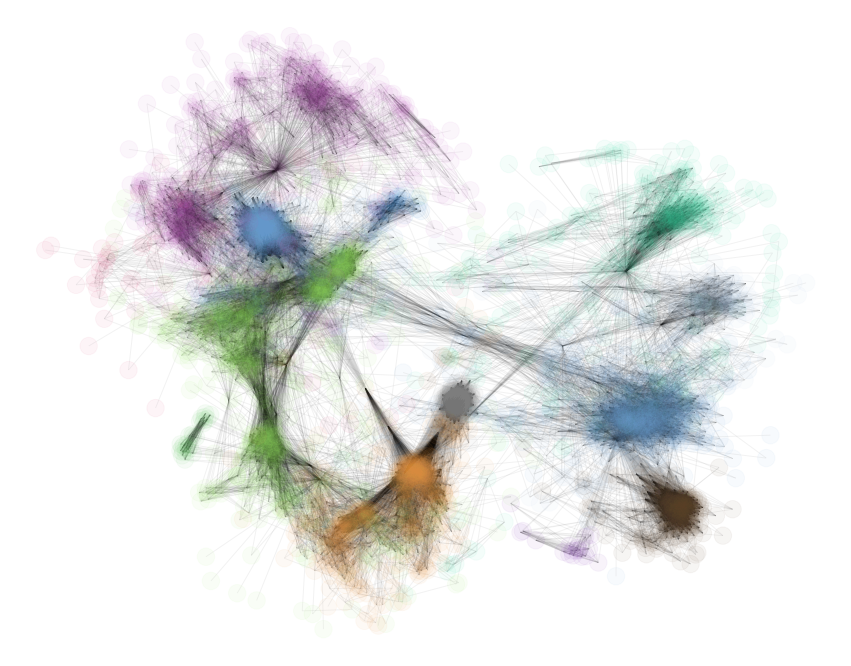

In [104]:
f, ax = plt.subplots(figsize=(15,12))
nx.draw_networkx(
        fb, 
        pos=pos, 
        node_size=0, 
        edgelist=external, 
        edge_color="silver",
        node_color=node_color,
        alpha=0.2, 
        with_labels=False, ax=ax)
# internal edges
nx.draw_networkx(
    fb, pos=pos, 
    edgelist=internal, 
    edge_color=internal_color,
    node_color=node_color,
    alpha=0.05, 
    with_labels=False, ax=ax)
_ = plt.axis("off")

### clique detection

A clique is a subset of vertices of an undirected graph such that every two distinct vertices in the clique are adjacent; that is, its induced subgraph is complete. Cliques are in a way tight communities where every nodes is connected to every other.

In [167]:
def show_clique(G, k = 4, max_clique=None):
    """
    Draws the first clique of the specified size.
    """
    cliques = list(nx.algorithms.find_cliques(G))
    kclique = [clq for clq in cliques if len(clq) == k]
    
    if max_clique:
        kclique = max_clique = [max([clq for clq in cliques], key=len)]
    
    if len(kclique) > 0:        
        print(kclique[0])
        cols = ["red" if i in kclique[0] else "white" for i in G.nodes() ]
        nx.draw(G, with_labels=True, node_color= cols, edge_color="silver")
        return nx.subgraph(G, kclique[0])
    else:
        print("No clique of size %s."%k)
        return nx.Graph()

[0, 1, 2, 3, 13]


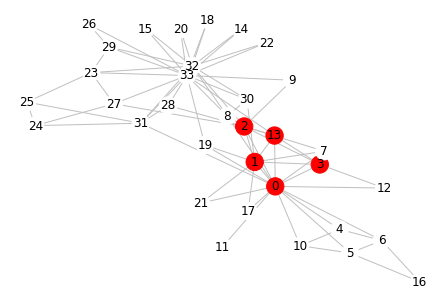

In [169]:
show_clique(G=G, k=3, max_clique=True)